In [5]:
import pandas as pd
import numpy as np

file_name = 'daegu_joongu.txt'
file_path = 'C:/Users/i/Desktop/'
card_df = pd.read_csv(file_path+file_name,sep=' ')
card_df.drop('GU_CD',axis=1,inplace=True)
card_df.columns = ['날짜','업종코드','수량']
card_df.head()

,날짜,업종코드,수량
0,2019-02-01,10,411
1,2019-02-01,20,925
2,2019-02-01,21,1908
3,2019-02-01,22,2128
4,2019-02-01,30,20


In [14]:
card_piv = card_df.pivot_table('수량',columns='업종코드',index='날짜',fill_value=0)
card_piv.head()

업종코드,10,20,21,22,30,31,32,33,34,35,...,44,50,52,60,62,70,71,80,81,92
날짜,,,,,,,,,,,,,,,,,,,,,
2019-02-01,411,925,1908,2128,20,5,99,1858,199,72,...,1990,1725,145,31,1807,18909,3618,48212,6823,91
2019-02-02,621,1937,2878,3686,10,5,131,1995,313,46,...,3716,2734,215,35,2096,13410,5253,64406,8354,167
2019-02-03,580,1453,2905,3399,5,0,82,1418,211,52,...,2788,2202,67,0,1545,2370,3842,55278,7277,68
2019-02-04,471,1298,2770,3203,0,0,97,1256,37,26,...,2745,2020,126,0,1361,2929,3209,44477,5909,41
2019-02-05,363,738,1560,2726,0,0,0,845,5,15,...,894,625,0,0,629,968,1119,22789,1682,15


In [36]:
card_19 = card_piv.iloc[:120].copy()
card_20 = card_piv.iloc[120:].copy()
card_19_week = card_19.iloc[3::7].copy()
card_20_week = card_20.iloc[3::7].copy()

for i in range(len(card_19_week)):
    for j in range(len(card_19_week.columns)):
        key = card_19_week.columns[j]
        card_19_week[key].iloc[i]=card_19[key].iloc[i*7+3:i*7+10].copy().mean()
        card_20_week[key].iloc[i]=card_20[key].iloc[i*7+3:i*7+10].copy().mean()

c:\programdata\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
card_19_week.index = map(lambda x : x[5:],card_19_week.index)
# card_20_week.index = map(lambda x : x[5:],card_20_week.index)
card_20_week.index = card_19_week.index

In [39]:
card_20_week.head()

업종코드,10,20,21,22,30,31,32,33,34,35,...,44,50,52,60,62,70,71,80,81,92
02-04,347.285714,801.857143,2278.857143,1225.285714,5.714286,2.142857,51.571429,1349.428571,251.571429,36.857143,...,1532.571429,1473.571429,159.857143,25.428571,1359.000000,14800.428571,2358.000000,38661.714286,4406.000000,100.714286
02-11,377.428571,1041.285714,2543.571429,1578.714286,12.857143,2.857143,55.857143,1486.285714,255.714286,32.714286,...,1797.857143,1668.571429,194.428571,30.142857,1481.857143,14476.428571,2560.428571,42938.285714,4665.000000,96.000000
02-18,161.428571,226.714286,1037.857143,473.285714,3.571429,5.857143,21.285714,1229.142857,115.857143,25.285714,...,410.428571,616.142857,105.857143,24.571429,717.142857,11872.000000,974.857143,16118.000000,3467.857143,71.000000
02-25,109.714286,117.142857,739.714286,213.571429,3.571429,2.857143,5.000000,997.857143,42.571429,17.857143,...,137.285714,384.714286,110.428571,25.000000,367.571429,7519.285714,502.714286,7878.571429,2687.857143,52.571429
03-04,114.714286,185.142857,736.857143,230.714286,6.428571,7.142857,15.142857,984.142857,75.857143,19.142857,...,233.285714,453.571429,123.428571,29.142857,507.714286,8371.428571,758.857143,10095.000000,2838.857143,60.714286


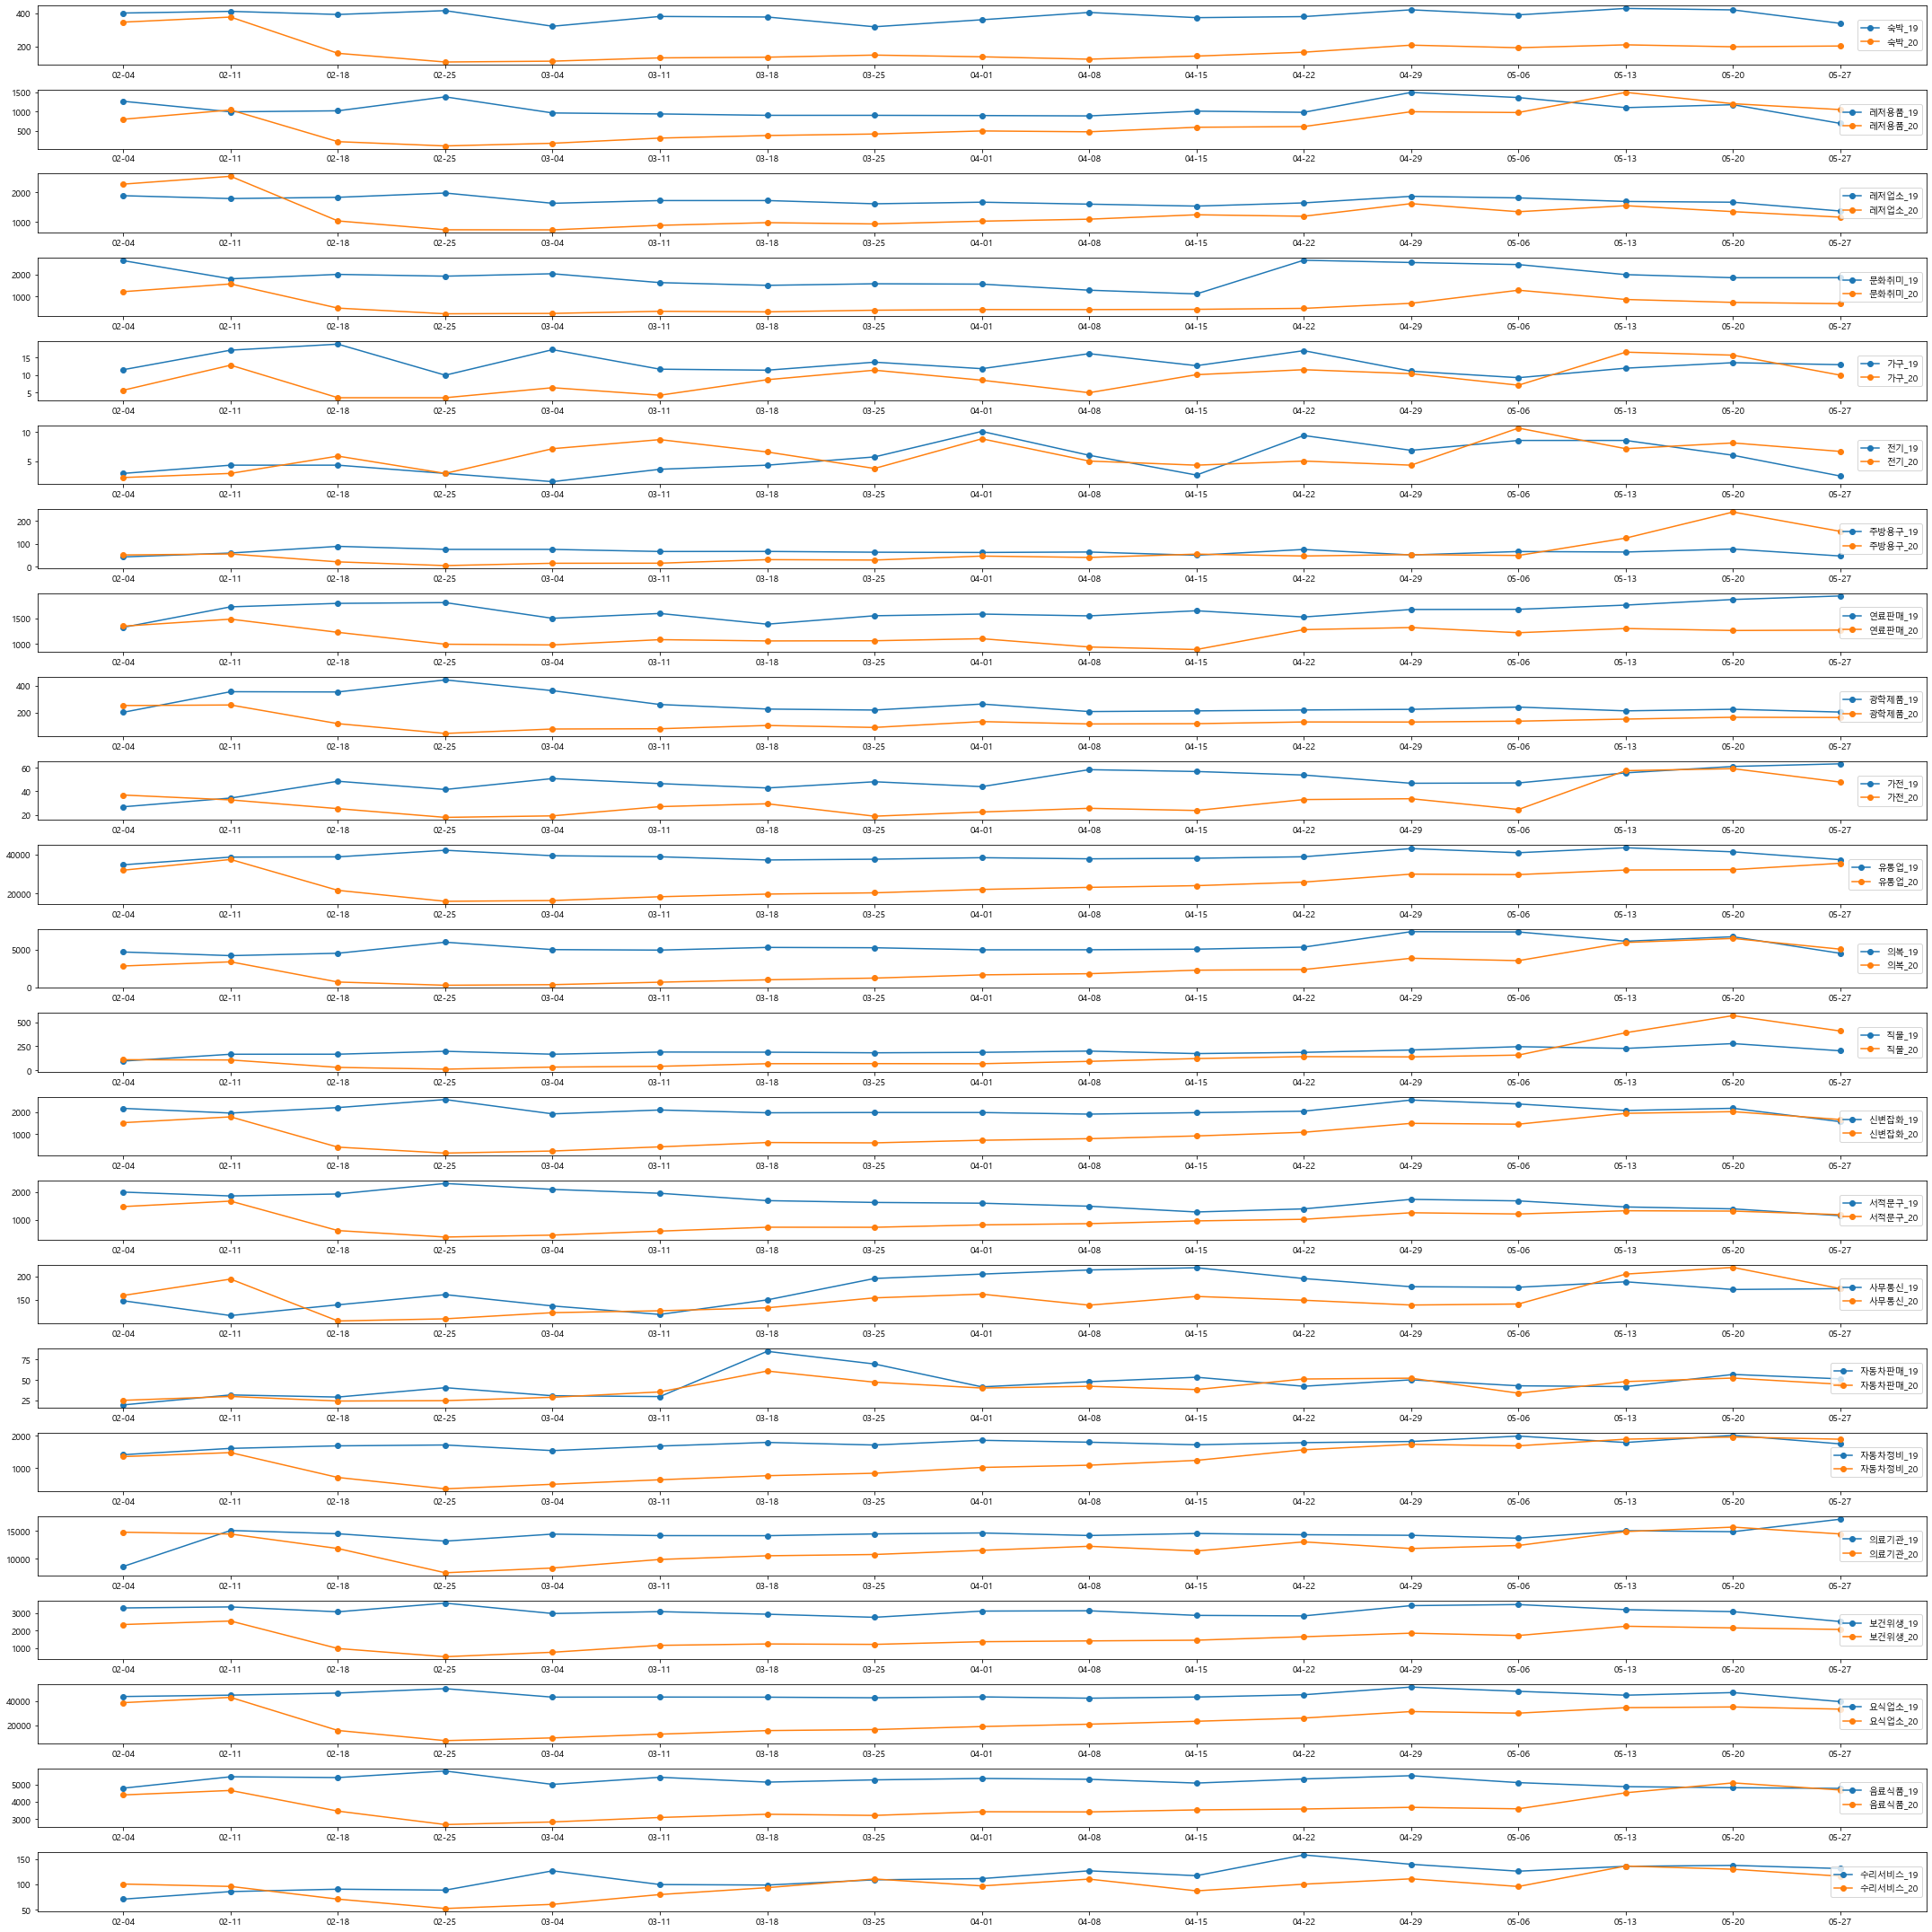

In [43]:
import matplotlib
import matplotlib.pyplot as plt 

Fg1 = plt.figure(figsize=(30,30))
plt.rc('font', family='Malgun Gothic')

names = ['숙박','레저용품','레저업소',
        '문화취미','가구','전기',
        '주방용구','연료판매','광학제품',
        '가전','유통업','의복','직물',
        '신변잡화','서적문구','사무통신',
        '자동차판매','자동차정비','의료기관',
        '보건위생','요식업소','음료식품','수리서비스']

for col in range(len(card_19_week.columns)):
    plt.subplot(len(card_19_week.columns),1,col+1)
    plt.plot(card_19_week[card_19_week.columns[col]],marker='o')
    plt.plot(card_20_week[card_20_week.columns[col]],marker='o')
    plt.legend([names[col]+'_19',names[col]+'_20'],loc='right')
plt.tight_layout()